In [181]:
#!pip install tensorflow
#!pip install Keras_Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [162]:
# Para el resampling
#!pip install imblearn

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from imblearn.combine import SMOTEENN, SMOTETomek

smote = SMOTE()

In [3]:
df= pd.read_csv('dfen_corpus.csv')
dfx1= pd.read_csv('dfenx1_corpus.csv')
dfx2= pd.read_csv('dfenx2_corpus.csv')
df0= pd.read_csv('dfen0_corpus.csv')
df0

ID                                              Title  \
0       27                                       Kenya Vision   
1       33  Second National Food and Nutrition Security Pl...   
2       34           National Nutrition Action Plan 2012-2017   
3       35                                        Vision 2025   
4       36      Plan Nacional de Restauración y Reforestación   
...    ...                                                ...   
2599  4114  Programa Nacional de Pesca y Acuacultura 2020-...   
2600  4115   Nationally Determined Contribution - Update 2022   
2601  4116   Nationally Determined Contribution - 2020 Update   
2602  4117  Intended Nationally Determined Contribution (I...   
2603  4119          National Crusade against Hunger 2013-2018   

                                            Description  \
0     Kenya Vision 2030 is the country’s long term d...   
1     The 2nd National Food and Nutrition Security P...   
2      The Kenya National Nutrition Action Plan has ...   
3     The Government of Pakistan (GoP) adopted a lon...   
4     Within the framework of International Earth Da...   
...                                                 ...   
2599  The National Fisheries and Aquaculture Program...   
2600  Mexico endorses its commitment to the Paris Ag...   
2601  This document constitutes Mexico's update for ...   
2602  The INDC of Mexico has two components, one for...   
2603  The National Crusade against Hunger (Crusade) ...   

                                                 addinf  \
0                                                         
1     The PlanSAN is the main instrument for plannin...   
2                                                         
3                                                         
4     This Plan reinforces the commitment assumed by...   
...                                                 ...   
2599                                                      
2600  Considering the principle of common but differ...   
2601  Mexico is among the 20 most emitting countries...   
2602                                                      
2603  Community kitchens, Full Time Schools, Hunger ...   

                                                    CPP  From date  \
0                                                           2008.0   
1                                                           2016.0   
2                                                           2012.0   
3     The Government of Pakistan adopted Vision 2025...     2014.0   
4                                                           2016.0   
...                                                 ...        ...   
2599                                                        2020.0   
2600  Mexico endorses its commitment to the Paris Ag...     2022.0   
2601   Through the NDC update, Mexico reaffirms its ...     2020.0   
2602  The INDC of Mexico has two components, one for...     2015.0   
2603                                                        2013.0   

                          Policy category 1  Policy category code 1  \
0         Long-term development plan/vision                    11.0   
1     Food security and nutrition (general)                    21.0   
2                                 Nutrition                    22.0   
3         Long-term development plan/vision                    11.0   
4                                  Forestry                    52.0   
...                                     ...                     ...   
2599              Fisheries and aquaculture                    34.0   
2600                         Climate change                    55.0   
2601                         Climate change                    55.0   
2602                         Climate change                    55.0   
2603  Food security and nutrition (general)                    21.0   

      Policy category code 2  \
0                        0.0   
1                        0.0   
2                  

In [4]:
counter = Counter(df['Policy category 1'].tolist())
tot_pol = {i[0]: idx for idx, i in enumerate(counter.most_common(27))}
df = df[df['Policy category 1'].map(lambda x: x in tot_pol)]

counter = Counter(dfx1['Policy category 1'].tolist())
tot_polx1 = {i[0]: idx for idx, i in enumerate(counter.most_common(27))}
dfx1 = dfx1[dfx1['Policy category 1'].map(lambda x: x in tot_polx1)]

counter = Counter(dfx2['Policy category 1'].tolist())
tot_polx2 = {i[0]: idx for idx, i in enumerate(counter.most_common(27))}
dfx2 = dfx2[dfx2['Policy category 1'].map(lambda x: x in tot_polx2)]

counter = Counter(df0['Policy category 1'].tolist())
tot_pol0 = {i[0]: idx for idx, i in enumerate(counter.most_common(27))}
df0 = df0[df0['Policy category 1'].map(lambda x: x in tot_pol0)]

tot_pol

{'Social protection (general)': 0,
 'Agriculture and rural development (general)': 1,
 'Natural resources (general)': 2,
 'Long-term development plan/vision': 3,
 'Mid-term implementation strategy': 4,
 'Food security and nutrition (general)': 5,
 'Climate change': 6,
 'Forestry': 7,
 'Nutrition': 8,
 'Biodiversity': 9,
 'Disaster risk reduction and management': 10,
 'Fisheries and aquaculture': 11,
 'Territorial development': 12,
 'Youth development': 13,
 'Water resources management': 14,
 'Gender': 15,
 'Crop development and diversification': 16,
 'poverty reduction': 17,
 'Livestock': 18,
 'Investment plan': 19,
 'Labour and employment': 20,
 'Land': 21,
 'Trade (general)': 22,
 'Food safety': 23,
 'Value chain development': 24,
 'Export promotion and diversification': 25,
 'Food loss and waste': 26}

In [73]:
X0_list = df['corpus0'].tolist()
X1_list = df['corpus1'].tolist()
X2_list = df['corpus2'].tolist()
X3_list = df['corpus3'].tolist()
X4_list = df['corpus4'].tolist()
X5_list = df['corpus5'].tolist()
X6_list = dfx1['corpus5'].tolist()
X7_list = dfx2['corpus5'].tolist()
X8_list = df0['corpus5'].tolist()

y_list= y_list0 = y_list1= y_list2=y_list3=y_list4=y_list5= np.array([tot_pol[i] for i in df['Policy category 1'].tolist()])
y_listx1=y_list6 = np.array([tot_pol[i] for i in dfx1['Policy category 1'].tolist()])
y_listx2 = y_list7 = np.array([tot_pol[i] for i in dfx2['Policy category 1'].tolist()])
y_list_0 = y_list8 = np.array([tot_pol[i] for i in df0['Policy category 1'].tolist()])

X0_list

['Kenya Vision Kenya Vision 2030\xa0is the country’s long term development blueprint aimed at transforming Kenya\xa0into a “newly industrializing, middle-income country providing a high quality of life to all its citizens by 2030”. It identifies agriculture as one of the key sectors to achieve an annual economic growth rate of 10 percent. Under Vision 2030, smallholder agriculture will be transformed from subsistence activities, marked by low productivity and value addition, to “an innovative, commercially-oriented, internationally competitive and modern agricultural sector”. Vision 2030 is implemented through successive 5-year Medium-Term Plans (MTPs) which identify priorities in terms of policies, programmes and interventions. Vision 2030 is based on three pillars: the economic, the social and the political. The adoption of Vision 2030 comes after the successful implementation of the Economic Recovery Strategy for Wealth and Employment Creation (ERS).    ',
 "Second National Food and

In [16]:
count_vect = CountVectorizer()
x_counts0 = count_vect.fit_transform(X0_list)
x_counts1 = count_vect.fit_transform(X1_list)
x_counts2 = count_vect.fit_transform(X2_list)
x_counts3 = count_vect.fit_transform(X3_list)
x_counts4 = count_vect.fit_transform(X4_list)
x_counts5 = count_vect.fit_transform(X5_list)
x_counts6 = count_vect.fit_transform(X6_list)
x_counts7 = count_vect.fit_transform(X7_list)
x_counts8 = count_vect.fit_transform(X8_list)
x_counts0

<3589x15472 sparse matrix of type '<class 'numpy.int64'>'
	with 357922 stored elements in Compressed Sparse Row format>

In [17]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf0 = tfidf_transformer.fit_transform(x_counts0)
x_train_tfidf1 = tfidf_transformer.fit_transform(x_counts1)
x_train_tfidf2 = tfidf_transformer.fit_transform(x_counts2)
x_train_tfidf3 = tfidf_transformer.fit_transform(x_counts3)
x_train_tfidf4 = tfidf_transformer.fit_transform(x_counts4)
x_train_tfidf5 = tfidf_transformer.fit_transform(x_counts5)
x_train_tfidf6 = tfidf_transformer.fit_transform(x_counts6)
x_train_tfidf7 = tfidf_transformer.fit_transform(x_counts7)
x_train_tfidf8 = tfidf_transformer.fit_transform(x_counts8)
x_train_tfidf0

<3589x15472 sparse matrix of type '<class 'numpy.float64'>'
	with 357922 stored elements in Compressed Sparse Row format>

In [77]:
random_state=0
test_size=0.20
train_x0, test_x0, train_y0, test_y0 = train_test_split(x_train_tfidf0, y_list, test_size=test_size, random_state = random_state)
train_x1, test_x1, train_y1, test_y1 = train_test_split(x_train_tfidf1, y_list, test_size=test_size, random_state = random_state)
train_x2, test_x2, train_y2, test_y2 = train_test_split(x_train_tfidf2, y_list, test_size=test_size, random_state = random_state)
train_x3, test_x3, train_y3, test_y3 = train_test_split(x_train_tfidf3, y_list, test_size=test_size, random_state = random_state)
train_x4, test_x4, train_y4, test_y4 = train_test_split(x_train_tfidf4, y_list, test_size=test_size, random_state = random_state)
train_x5, test_x5, train_y5, test_y5 = train_test_split(x_train_tfidf5, y_list, test_size=test_size, random_state = random_state)
train_x6, test_x6, train_y6, test_y6 = train_test_split(x_train_tfidf6, y_listx1, test_size=test_size, random_state = random_state)
train_x7, test_x7, train_y7, test_y7 = train_test_split(x_train_tfidf7, y_listx2, test_size=test_size, random_state = random_state)
train_x8, test_x8, train_y8, test_y8 = train_test_split(x_train_tfidf8, y_list8, test_size=test_size, random_state = random_state)

# MultinomialNB

In [78]:
clf0 = MultinomialNB().fit(train_x0, train_y0)
y_score0 = clf0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1
        
clf1 = MultinomialNB().fit(train_x1, train_y1)
y_score1 = clf1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1
        
clf2 = MultinomialNB().fit(train_x2, train_y2)
y_score2 = clf2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
clf3 = MultinomialNB().fit(train_x3, train_y3)
y_score3 = clf3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

clf4 = MultinomialNB().fit(train_x4, train_y4)
y_score4 = clf4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1
        
clf5 = MultinomialNB().fit(train_x5, train_y5)
y_score5 = clf5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1

clf6 = MultinomialNB().fit(train_x6, train_y6)
y_score6 = clf6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1

clf7 = MultinomialNB().fit(train_x7, train_y7)
y_score7 = clf7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1

clf8 = MultinomialNB().fit(train_x8, train_y8)
y_score8 = clf8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1

print("Accuracy clf0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy clf1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy clf2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy clf3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy clf4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy clf5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy clf6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy clf7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy clf8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy clf0: 42.20%
Accuracy clf1: 45.96%
Accuracy clf2: 45.82%
Accuracy clf3: 49.03%
Accuracy clf4: 52.65%
Accuracy clf5: 52.65%
Accuracy clf6: 50.00%
Accuracy clf7: 48.65%
Accuracy clf8: 64.68%


# SVC

In [81]:
from sklearn.svm import SVC
SVC0 = SVC(kernel='linear').fit(train_x0, train_y0)
y_score0 = SVC0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

SVC1 = SVC(kernel='linear').fit(train_x1, train_y1)
y_score1 = SVC1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

SVC2 = SVC(kernel='linear').fit(train_x2, train_y2)
y_score2 = SVC2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
SVC3 = SVC(kernel='linear').fit(train_x3, train_y3)
y_score3 = SVC3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

SVC4 = SVC(kernel='linear').fit(train_x4, train_y4)
y_score4 = SVC4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

SVC5 = SVC(kernel='linear').fit(train_x5, train_y5)
y_score5 = SVC5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1

SVC6 = SVC(kernel='linear').fit(train_x6, train_y6)
y_score6 = SVC6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
SVC7 = SVC(kernel='linear').fit(train_x7, train_y7)
y_score7 = SVC7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1

SVC8 = SVC(kernel='linear').fit(train_x8, train_y8)
y_score8 = SVC8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
        
print("Accuracy SVC0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy SVC1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy SVC2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy SVC3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy SVC4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy SVC5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy SVC6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy SVC7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy SVC8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))


Accuracy SVC0: 65.88%
Accuracy SVC1: 66.16%
Accuracy SVC2: 65.88%
Accuracy SVC3: 66.02%
Accuracy SVC4: 66.43%
Accuracy SVC5: 64.76%
Accuracy SVC6: 62.82%
Accuracy SVC7: 64.71%
Accuracy SVC8: 75.24%


In [219]:
train_x8_20, test_x8_20, train_y8_20, test_y8_20 = train_test_split(x_train_tfidf8, y_list0, test_size=0.2, random_state = random_state)

SVC8_20 = SVC(kernel='linear').fit(train_x8_20, train_y8_20)
y_score8_20 = SVC8_20.predict(test_x8_20)
n_right8_20 = 0
for i in range(len(y_score8_20)):
    if y_score8_20[i] == test_y8_20[i]:
        n_right8_20 += 1
print("Accuracy SVC8: %.2f%%" % ((n_right8_20/float(len(test_y8_20)) * 100)))

Accuracy SVC8: 75.24%


In [82]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [182]:
for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(train_x8, train_y8)# Make prediction
    y_pred8 = svclassifier.predict(test_x8)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(test_y8,y_pred8))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.13      1.00      0.24        70
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        33
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00        41
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00        29
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y8, y_pred8)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
SVCacc= pd.Series(cm.diagonal())
print(SVCacc)

0     0.871429
1     0.900000
2     0.741935
3     0.371429
4     0.545455
5     0.846154
6     0.829268
7     0.964286
8     0.769231
9     0.933333
10    0.724138
11    0.866667
12    0.090909
13    0.875000
14    0.909091
15    1.000000
16    0.375000
17    0.750000
18    0.714286
19    0.200000
20    0.750000
21    0.666667
22    1.000000
23    0.000000
24    0.500000
25    0.000000
26    0.000000
dtype: float64


In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(train_x8, train_y8)
print(grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.9s
[CV] END ...................C=0.1, gamma=0.01, k

In [93]:
from sklearn.metrics import confusion_matrix
grid_predictions = grid.predict(test_x8)
#print(confusion_matrix(test_y8,grid_predictions))
print(classification_report(test_y8,grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        70
           1       0.70      0.88      0.78        40
           2       0.72      0.74      0.73        31
           3       0.44      0.46      0.45        35
           4       0.40      0.52      0.45        33
           5       0.84      0.82      0.83        39
           6       0.94      0.83      0.88        41
           7       0.96      0.96      0.96        28
           8       0.95      0.73      0.83        26
           9       0.82      0.93      0.87        30
          10       0.88      0.79      0.84        29
          11       1.00      0.93      0.97        15
          12       0.25      0.09      0.13        11
          13       0.60      0.75      0.67         8
          14       0.77      0.91      0.83        11
          15       0.95      1.00      0.97        19
          16       0.75      0.38      0.50         8
          17       0.60    

In [108]:
SVC8 = SVC(kernel='linear', C=3, gamma=1).fit(train_x8, train_y8)
y_score8 = SVC8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
print("Accuracy SVC8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy SVC8: 76.20%


In [170]:
#resampling

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from imblearn.combine import SMOTEENN, SMOTETomek
ros = RandomOverSampler(random_state=777)
ros2 = RandomOverSampler(random_state=777)
ros_train_x8, ros_train_y8 = ros.fit_resample(train_x8, train_y8)
ros_test_x8, ros_test_y8 = ros2.fit_resample(test_x8, test_y8)

SVC8 = SVC(kernel='linear', C=3, gamma=1).fit(ros_train_x8, ros_train_y8)
y_score8 = SVC8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
print("Accuracy SVC8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy SVC8: 76.01%


In [163]:
#SMOTE
sm = SMOTE(random_state=0, k_neighbors=4)
sm_train_x5, sm_train_y5 = sm.fit_resample(train_x5, train_y5)
SVC5 = SVC(kernel='linear', C=3, gamma=1).fit(sm_train_x5, sm_train_y5)
y_score5 = SVC5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
print("Accuracy SVC8: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))

Accuracy SVC8: 64.48%


In [164]:
sm = SMOTE(random_state=0, k_neighbors=1)
sm_train_x8, sm_train_y8 = sm.fit_resample(train_x8, train_y8)
SVC8sm = SVC(kernel='linear', C=3, gamma=1).fit(sm_train_x8, sm_train_y8)
y_score8 = SVC8sm.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
print("Accuracy SVC8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy SVC8: 75.62%


In [184]:
from sklearn.svm import SVC
SVC_opt= SVC(kernel='linear', C=3, gamma=1)
SVC0 = SVC_opt.fit(train_x0, train_y0)
y_score0 = SVC0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

SVC1 = SVC_opt.fit(train_x1, train_y1)
y_score1 = SVC1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

SVC2 = SVC_opt.fit(train_x2, train_y2)
y_score2 = SVC2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
SVC3 = SVC_opt.fit(train_x3, train_y3)
y_score3 = SVC3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

SVC4 = SVC_opt.fit(train_x4, train_y4)
y_score4 = SVC4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

SVC5 = SVC_opt.fit(train_x5, train_y5)
y_score5 = SVC5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1

SVC6 = SVC_opt.fit(train_x6, train_y6)
y_score6 = SVC6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
SVC7 = SVC_opt.fit(train_x7, train_y7)
y_score7 = SVC7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1

SVC8 = SVC_opt.fit(train_x8, train_y8)
y_score8 = SVC8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
        
print("Accuracy SVC_Opt0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy SVC_Opt1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy SVC_Opt2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy SVC_Opt3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy SVC_Opt4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy SVC_Opt5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy SVC_Opt6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy SVC_Opt7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy SVC_Opt8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))


Accuracy SVC_Opt0: 64.48%
Accuracy SVC_Opt1: 65.04%
Accuracy SVC_Opt2: 64.62%
Accuracy SVC_Opt3: 65.18%
Accuracy SVC_Opt4: 65.46%
Accuracy SVC_Opt5: 65.04%
Accuracy SVC_Opt6: 62.68%
Accuracy SVC_Opt7: 62.00%
Accuracy SVC_Opt8: 76.20%


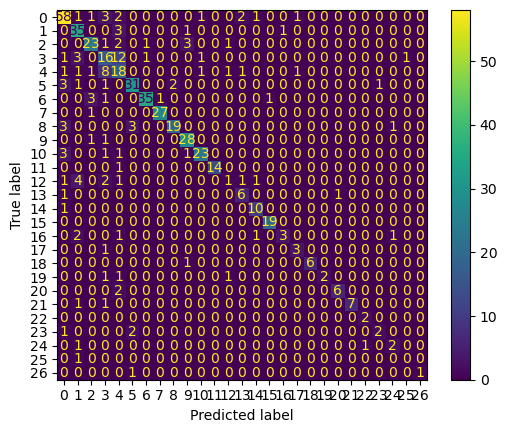

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(SVC8, test_x8, test_y8)

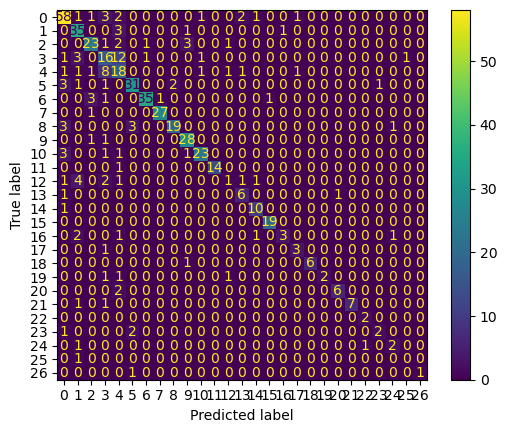

In [185]:
y_pred8 = SVC8.predict(test_x8)
ConfusionMatrixDisplay.from_predictions(test_y8, y_pred8)

In [128]:


cm = confusion_matrix(test_y8, y_pred8)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.color_palette("cubehelix_r", as_cmap=True)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='cubehelix_r')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [244]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y8, y_pred8)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
SVCoptacc= pd.Series(cm.diagonal())
print(SVCoptacc)

0     0.828571
1     0.875000
2     0.741935
3     0.457143
4     0.545455
5     0.794872
6     0.853659
7     0.964286
8     0.730769
9     0.933333
10    0.793103
11    0.933333
12    0.090909
13    0.750000
14    0.909091
15    1.000000
16    0.375000
17    0.750000
18    0.857143
19    0.400000
20    0.750000
21    0.777778
22    1.000000
23    0.400000
24    0.500000
25    0.000000
26    0.500000
dtype: float64


# Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
RF =  RandomForestClassifier()

RF0 = RF.fit(train_x0, train_y0)
y_score0 = RF0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

RF1 = RF.fit(train_x1, train_y1)
y_score1 = RF1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

RF2 = RF.fit(train_x2, train_y2)
y_score2 = RF2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
RF3 = RF.fit(train_x3, train_y3)
y_score3 = RF3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

RF4 = RF.fit(train_x4, train_y4)
y_score4 = RF4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

RF5 = RF.fit(train_x5, train_y5)
y_score5 = RF5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
RF6 = RF.fit(train_x6, train_y6)
y_score6 = RF6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
RF7 = RF.fit(train_x7, train_y7)
y_score7 = RF7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
RF8 = RF.fit(train_x8, train_y8)
y_score8 = RF8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy RF0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy RF1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy RF2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy RF3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy RF4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy RF5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy RF6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy RF7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy RF8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy RF0: 59.19%
Accuracy RF1: 58.64%
Accuracy RF2: 61.70%
Accuracy RF3: 59.89%
Accuracy RF4: 60.72%
Accuracy RF5: 61.00%
Accuracy RF6: 57.93%
Accuracy RF7: 59.14%
Accuracy RF8: 71.59%


In [199]:
RF8_20 = RF.fit(train_x8_20, train_y8_20)
y_score8_20 = RF8_20.predict(test_x8_20)
n_right8_20 = 0
for i in range(len(y_score8_20)):
    if y_score8_20[i] == test_y8_20[i]:
        n_right8_20 += 1
print("Accuracy RF8: %.2f%%" % ((n_right8_20/float(len(test_y8_20)) * 100)))

NameError: name 'train_x8_20' is not defined

In [187]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [194]:
grid = RandomizedSearchCV(RF,random_grid,refit=True,verbose=2)
grid.fit(train_x8, train_y8)
print(grid.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.7s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.8s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.8s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  13.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120

In [196]:
RF =  RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)
RF8 = RF.fit(train_x8, train_y8)
y_score8 = RF8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
        
print("Accuracy RF8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy RF8: 73.90%


In [198]:
RF =  RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)

RF0 = RF.fit(train_x0, train_y0)
y_score0 = RF0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

RF1 = RF.fit(train_x1, train_y1)
y_score1 = RF1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

RF2 = RF.fit(train_x2, train_y2)
y_score2 = RF2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
RF3 = RF.fit(train_x3, train_y3)
y_score3 = RF3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

RF4 = RF.fit(train_x4, train_y4)
y_score4 = RF4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

RF5 = RF.fit(train_x5, train_y5)
y_score5 = RF5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
RF6 = RF.fit(train_x6, train_y6)
y_score6 = RF6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
RF7 = RF.fit(train_x7, train_y7)
y_score7 = RF7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
RF8 = RF.fit(train_x8, train_y8)
y_score8 = RF8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy RF0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy RF1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy RF2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy RF3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy RF4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy RF5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy RF6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy RF7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy RF8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy RF0: 62.40%
Accuracy RF1: 62.40%
Accuracy RF2: 61.42%
Accuracy RF3: 62.53%
Accuracy RF4: 62.95%
Accuracy RF5: 63.09%
Accuracy RF6: 59.22%
Accuracy RF7: 59.78%
Accuracy RF8: 74.28%


# Logistic regression

In [230]:
from sklearn.linear_model import LogisticRegression
LG =  LogisticRegression(random_state=0, solver='liblinear')

LG0 = LG.fit(train_x0, train_y0)
y_score0 = LG0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

LG1 = LG.fit(train_x1, train_y1)
y_score1 = LG1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

LG2 = LG.fit(train_x2, train_y2)
y_score2 = LG2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
LG3 = LG.fit(train_x3, train_y3)
y_score3 = LG3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

LG4 = LG.fit(train_x4, train_y4)
y_score4 = LG4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

LG5 = LG.fit(train_x5, train_y5)
y_score5 = LG5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
LG6 = LG.fit(train_x6, train_y6)
y_score6 = LG6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
LG7 = LG.fit(train_x7, train_y7)
y_score7 = LG7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
LG8 = LG.fit(train_x8, train_y8)
y_score8 = LG8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy LG0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy LG1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy LG2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy LG3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy LG4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy LG5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy LG6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy LG7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy LG8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy_LG0l=n_right0/float(len(test_y0)) * 100
Accuracy_LG1l=n_right1/float(len(test_y1)) * 100
Accuracy_LG2l=n_right2/float(len(test_y2)) * 100
Accuracy_LG3l=n_right3/float(len(test_y3)) * 100
Accuracy_LG4l=n_right4/float(len(test_y4)) * 100
Accuracy_LG5l=n_right5/float(len(test_y5)) * 100
Accuracy_LG6l=n_right6/float(len(test_y6)) * 100
Accuracy_LG7l=n_right7/float(len(test_y7)) * 100
Accuracy_LG8l=n_right8/float(len(test_y8)) * 100

Accuracy LG0: 63.42%
Accuracy LG1: 64.05%
Accuracy LG2: 64.30%
Accuracy LG3: 64.56%
Accuracy LG4: 64.81%
Accuracy LG5: 63.80%
Accuracy LG6: 62.04%
Accuracy LG7: 63.87%
Accuracy LG8: 73.47%


In [231]:
LG =  LogisticRegression(random_state=0, solver='newton-cg')

LG0 = LG.fit(train_x0, train_y0)
y_score0 = LG0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

LG1 = LG.fit(train_x1, train_y1)
y_score1 = LG1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

LG2 = LG.fit(train_x2, train_y2)
y_score2 = LG2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
LG3 = LG.fit(train_x3, train_y3)
y_score3 = LG3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

LG4 = LG.fit(train_x4, train_y4)
y_score4 = LG4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

LG5 = LG.fit(train_x5, train_y5)
y_score5 = LG5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
LG6 = LG.fit(train_x6, train_y6)
y_score6 = LG6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
LG7 = LG.fit(train_x7, train_y7)
y_score7 = LG7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
LG8 = LG.fit(train_x8, train_y8)
y_score8 = LG8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy LG0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy LG1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy LG2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy LG3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy LG4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy LG5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy LG6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy LG7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy LG8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))
Accuracy_LG0n=n_right0/float(len(test_y0)) * 100
Accuracy_LG1n=n_right1/float(len(test_y1)) * 100
Accuracy_LG2n=n_right2/float(len(test_y2)) * 100
Accuracy_LG3n=n_right3/float(len(test_y3)) * 100
Accuracy_LG4n=n_right4/float(len(test_y4)) * 100
Accuracy_LG5n=n_right5/float(len(test_y5)) * 100
Accuracy_LG6n=n_right6/float(len(test_y6)) * 100
Accuracy_LG7n=n_right7/float(len(test_y7)) * 100
Accuracy_LG8n=n_right8/float(len(test_y8)) * 100

Accuracy LG0: 63.42%
Accuracy LG1: 64.18%
Accuracy LG2: 63.92%
Accuracy LG3: 64.68%
Accuracy LG4: 65.06%
Accuracy LG5: 64.18%
Accuracy LG6: 62.30%
Accuracy LG7: 64.02%
Accuracy LG8: 73.65%


In [175]:
y_score8

array([ 7,  5,  9,  5, 15,  2,  9, 15, 13,  3, 14,  7,  7,  6, 10,  3, 10,
        5,  9,  6,  0,  4,  0,  1,  2, 10,  1, 15, 10, 14,  1,  0,  3,  1,
        0,  1,  7, 14,  8,  3,  3,  9,  3,  0,  0,  3,  1,  0, 10,  7, 15,
       15,  8, 14, 13, 14,  1,  2,  5,  0,  8, 10, 18,  6,  1,  3,  0,  0,
        1,  5,  1,  8, 15,  5,  2,  0,  9,  4,  7, 21,  5,  3, 14,  9,  5,
        3, 10, 11,  5,  4,  6,  9,  8,  9,  9,  3,  0,  4, 13,  4,  0, 15,
        7,  8,  1,  6,  6,  2,  0,  1,  0,  6,  0,  0,  0, 15,  4,  0,  6,
        6,  0,  3,  4,  0,  0,  1,  0,  0,  2,  4,  1,  6,  4, 11, 21,  3,
        6,  0, 20,  5,  1, 14,  0,  1,  0,  3,  1,  6, 15,  5,  5,  7,  0,
       21,  5,  8,  1, 10,  0,  1,  2,  7,  4,  0,  9,  7,  2,  4,  1,  0,
        4,  5,  1,  0,  3,  6,  0,  5,  3,  9,  2,  8, 10,  1,  2,  7,  8,
        7,  7,  1, 10,  8,  0,  4,  6,  2,  5,  0,  7,  3, 11,  4,  5,  5,
        0,  0, 13,  6,  1,  1,  0,  2,  9, 10,  5,  5,  7,  4,  3,  9, 18,
       21,  5, 10,  6,  0

In [232]:
from sklearn.linear_model import LogisticRegression
LG =  LogisticRegression(random_state=0, solver='sag')

LG0 = LG.fit(train_x0, train_y0)
y_score0 = LG0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

LG1 = LG.fit(train_x1, train_y1)
y_score1 = LG1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

LG2 = LG.fit(train_x2, train_y2)
y_score2 = LG2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
LG3 = LG.fit(train_x3, train_y3)
y_score3 = LG3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

LG4 = LG.fit(train_x4, train_y4)
y_score4 = LG4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

LG5 = LG.fit(train_x5, train_y5)
y_score5 = LG5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
LG6 = LG.fit(train_x6, train_y6)
y_score6 = LG6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
LG7 = LG.fit(train_x7, train_y7)
y_score7 = LG7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
LG8 = LG.fit(train_x8, train_y8)
y_score8 = LG8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy LG0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy LG1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy LG2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy LG3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy LG4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy LG5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy LG6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy LG7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy LG8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy LG0: 63.42%
Accuracy LG1: 64.18%
Accuracy LG2: 63.92%
Accuracy LG3: 64.68%
Accuracy LG4: 65.06%
Accuracy LG5: 64.18%
Accuracy LG6: 62.30%
Accuracy LG7: 64.02%
Accuracy LG8: 73.65%


In [160]:
from sklearn.linear_model import LogisticRegression
LG =  LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')

LG0 = LG.fit(train_x0, train_y0)
y_score0 = LG0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

LG1 = LG.fit(train_x1, train_y1)
y_score1 = LG1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

LG2 = LG.fit(train_x2, train_y2)
y_score2 = LG2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
LG3 = LG.fit(train_x3, train_y3)
y_score3 = LG3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

LG4 = LG.fit(train_x4, train_y4)
y_score4 = LG4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

LG5 = LG.fit(train_x5, train_y5)
y_score5 = LG5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
LG6 = LG.fit(train_x6, train_y6)
y_score6 = LG6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
LG7 = LG.fit(train_x7, train_y7)
y_score7 = LG7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
LG8 = LG.fit(train_x8, train_y8)
y_score8 = LG8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy LG0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy LG1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy LG2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy LG3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy LG4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy LG5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy LG6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy LG7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy LG8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy_LG0l=n_right0/float(len(test_y0)) * 100
Accuracy_LG1l=n_right1/float(len(test_y1)) * 100
Accuracy_LG2l=n_right2/float(len(test_y2)) * 100
Accuracy_LG3l=n_right3/float(len(test_y3)) * 100
Accuracy_LG4l=n_right4/float(len(test_y4)) * 100
Accuracy_LG5l=n_right5/float(len(test_y5)) * 100
Accuracy_LG6l=n_right6/float(len(test_y6)) * 100
Accuracy_LG7l=n_right7/float(len(test_y7)) * 100
Accuracy_LG8l=n_right8/float(len(test_y8)) * 100

Accuracy LG0: 63.23%
Accuracy LG1: 64.62%
Accuracy LG2: 64.35%
Accuracy LG3: 64.62%
Accuracy LG4: 65.88%
Accuracy LG5: 64.62%
Accuracy LG6: 60.95%
Accuracy LG7: 64.71%
Accuracy LG8: 73.90%


In [161]:
from sklearn.linear_model import LogisticRegression
LG =  LogisticRegression(random_state=0, solver='lbfgs')

LG0 = LG.fit(train_x0, train_y0)
y_score0 = LG0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

LG1 = LG.fit(train_x1, train_y1)
y_score1 = LG1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

LG2 = LG.fit(train_x2, train_y2)
y_score2 = LG2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
LG3 = LG.fit(train_x3, train_y3)
y_score3 = LG3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

LG4 = LG.fit(train_x4, train_y4)
y_score4 = LG4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

LG5 = LG.fit(train_x5, train_y5)
y_score5 = LG5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
LG6 = LG.fit(train_x6, train_y6)
y_score6 = LG6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
LG7 = LG.fit(train_x7, train_y7)
y_score7 = LG7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
LG8 = LG.fit(train_x8, train_y8)
y_score8 = LG8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy LG0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy LG1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy LG2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy LG3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy LG4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy LG5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy LG6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy LG7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy LG8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy_LG0l=n_right0/float(len(test_y0)) * 100
Accuracy_LG1l=n_right1/float(len(test_y1)) * 100
Accuracy_LG2l=n_right2/float(len(test_y2)) * 100
Accuracy_LG3l=n_right3/float(len(test_y3)) * 100
Accuracy_LG4l=n_right4/float(len(test_y4)) * 100
Accuracy_LG5l=n_right5/float(len(test_y5)) * 100
Accuracy_LG6l=n_right6/float(len(test_y6)) * 100
Accuracy_LG7l=n_right7/float(len(test_y7)) * 100
Accuracy_LG8l=n_right8/float(len(test_y8)) * 100

Accuracy LG0: 63.23%
Accuracy LG1: 64.62%
Accuracy LG2: 64.35%
Accuracy LG3: 64.62%
Accuracy LG4: 65.88%
Accuracy LG5: 64.62%
Accuracy LG6: 60.95%
Accuracy LG7: 64.71%
Accuracy LG8: 73.90%


# KNN

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
KNN =  KNeighborsClassifier(n_neighbors=5) #Probado von valores del 1 al 10

KNN0 = KNN.fit(train_x0, train_y0)
y_score0 = KNN0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

KNN1 = KNN.fit(train_x1, train_y1)
y_score1 = KNN1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

KNN2 = KNN.fit(train_x2, train_y2)
y_score2 = KNN2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
KNN3 = KNN.fit(train_x3, train_y3)
y_score3 = KNN3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

KNN4 = KNN.fit(train_x4, train_y4)
y_score4 = KNN4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

KNN5 = KNN.fit(train_x5, train_y5)
y_score5 = KNN5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
KNN6 = KNN.fit(train_x6, train_y6)
y_score6 = KNN6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
KNN7 = KNN.fit(train_x7, train_y7)
y_score7 = KNN7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
KNN8 = KNN.fit(train_x8, train_y8)
y_score8 = KNN8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy KNN0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy KNN1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy KNN2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy KNN3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy KNN4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy KNN5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy KNN6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy KNN7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy KNN8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))
print(classification_report(test_y0, y_score0))
print(classification_report(test_y1, y_score1))
print(classification_report(test_y2, y_score2))
print(classification_report(test_y3, y_score3))
print(classification_report(test_y4, y_score4))
print(classification_report(test_y5, y_score5))
print(classification_report(test_y6, y_score6))
print(classification_report(test_y7, y_score7))
print(classification_report(test_y8, y_score8))


Accuracy KNN0: 59.87%
Accuracy KNN1: 62.15%
Accuracy KNN2: 61.14%
Accuracy KNN3: 62.03%
Accuracy KNN4: 62.03%
Accuracy KNN5: 59.49%
Accuracy KNN6: 58.51%
Accuracy KNN7: 62.43%
Accuracy KNN8: 75.22%
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        88
           1       0.46      0.61      0.52        77
           2       0.53      0.56      0.55        62
           3       0.36      0.33      0.34        73
           4       0.35      0.31      0.33        65
           5       0.52      0.59      0.55        56
           6       0.70      0.89      0.79        56
           7       0.76      0.90      0.82        31
           8       0.68      0.70      0.69        33
           9       0.74      0.87      0.80        30
          10       0.79      0.79      0.79        19
          11       0.83      0.71      0.77        21
          12       1.00      0.29      0.45        24
          13       0.81      0.65      0.72  

In [158]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(train_x8, train_y8)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 2
Best n_neighbors: 8


In [201]:
KNN =  KNeighborsClassifier(n_neighbors=8, p=2, leaf_size=1) #Probado von valores del 1 al 10

KNN0 = KNN.fit(train_x0, train_y0)
y_score0 = KNN0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

KNN1 = KNN.fit(train_x1, train_y1)
y_score1 = KNN1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

KNN2 = KNN.fit(train_x2, train_y2)
y_score2 = KNN2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
KNN3 = KNN.fit(train_x3, train_y3)
y_score3 = KNN3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

KNN4 = KNN.fit(train_x4, train_y4)
y_score4 = KNN4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

KNN5 = KNN.fit(train_x5, train_y5)
y_score5 = KNN5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
KNN6 = KNN.fit(train_x6, train_y6)
y_score6 = KNN6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
KNN7 = KNN.fit(train_x7, train_y7)
y_score7 = KNN7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
KNN8 = KNN.fit(train_x8, train_y8)
y_score8 = KNN8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy KNN0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy KNN1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy KNN2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy KNN3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy KNN4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy KNN5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy KNN6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy KNN7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy KNN8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))
print(classification_report(test_y0, y_score0))
print(classification_report(test_y1, y_score1))
print(classification_report(test_y2, y_score2))
print(classification_report(test_y3, y_score3))
print(classification_report(test_y4, y_score4))
print(classification_report(test_y5, y_score5))
print(classification_report(test_y6, y_score6))
print(classification_report(test_y7, y_score7))
print(classification_report(test_y8, y_score8))


Accuracy KNN0: 62.40%
Accuracy KNN1: 62.95%
Accuracy KNN2: 63.09%
Accuracy KNN3: 62.95%
Accuracy KNN4: 63.23%
Accuracy KNN5: 61.28%
Accuracy KNN6: 60.23%
Accuracy KNN7: 63.43%
Accuracy KNN8: 74.28%
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        84
           1       0.56      0.65      0.60        71
           2       0.59      0.56      0.57        54
           3       0.40      0.42      0.41        67
           4       0.34      0.36      0.35        56
           5       0.55      0.69      0.61        54
           6       0.71      0.90      0.80        50
           7       0.74      0.97      0.84        30
           8       0.75      0.64      0.69        28
           9       0.78      0.96      0.86        26
          10       0.71      0.75      0.73        16
          11       0.80      0.67      0.73        18
          12       0.83      0.22      0.34        23
          13       0.80      0.71      0.75  

# Redes neuronales

In [209]:
#Para fijar resultados de las fredes neuronales
from numpy.random import seed
import random as rn
seed(1)
import tensorflow
x=2
tensorflow.random.set_seed(x)
rn.seed(x)

In [19]:
from nltk import word_tokenize
from collections import defaultdict

def count_top_x_words(corpus, top_x, skip_top_n):
    count = defaultdict(lambda: 0)
    for c in corpus:
        for w in word_tokenize(c):
            count[w] += 1
    count_tuples = sorted([(w, c) for w, c in count.items()], key=lambda x: x[1], reverse=True)
    return [i[0] for i in count_tuples[skip_top_n: skip_top_n + top_x]]


def replace_top_x_words_with_vectors(corpus, top_x):
    topx_dict = {top_x[i]: i for i in range(len(top_x))}

    return [
        [topx_dict[w] for w in word_tokenize(s) if w in topx_dict]
        for s in corpus
    ], topx_dict


def filter_to_top_x(corpus, n_top, skip_n_top=0):
    top_x = count_top_x_words(corpus, n_top, skip_n_top)
    return replace_top_x_words_with_vectors(corpus, top_x)

In [220]:
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import ELU, PReLU, LeakyReLU
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
from collections import Counter
from sklearn.model_selection import train_test_split
import nltk
import tensorflow as tf
#nltk.download('punkt')
from keras.utils import pad_sequences
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [223]:
corpuslist = X0_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df['Policy category 1'].tolist()]
list0 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list0, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Epoch 1/20
45/45 [==============================] - 5s 28ms/step - loss: 3.0839 - accuracy: 0.0881
Epoch 2/20
45/45 [==============================] - 1s 27ms/step - loss: 2.5272 - accuracy: 0.3107
Epoch 3/20
45/45 [==============================] - 1s 27ms/step - loss: 1.3678 - accuracy: 0.6440
Epoch 4/20
45/45 [==============================] - 1s 28ms/step - loss: 0.4235 - accuracy: 0.9161
Epoch 5/20
45/45 [==============================] - 1s 26ms/step - loss: 0.1207 - accuracy: 0.9857
Epoch 6/20
45/45 [==============================] - 1s 28ms/step - loss: 0.0431 - accuracy: 0.9969
Epoch 7/20
45/45 [==============================] - 1s 29ms/step - loss: 0.0247 - accuracy: 0.9979
Epoch 8/20
45/45 [==============================] - 1s 30ms/step - loss: 0.0182 - accuracy: 0.9976
Epoch 9/20
45/45 [==============================] - 1s 29ms/step - loss: 0.0123 - accuracy: 0.9983
Epoch 10/20
45/45 [==============================] - 1s 32ms/step - loss: 0.0123 - accuracy: 0.9990
Epoch 11/

In [224]:
corpuslist = X1_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df['Policy category 1'].tolist()]
list1 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list1, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score1 = model.predict(test_x)
y_score1 = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score1]
n_right1 = 0
for i in range(len(y_score)):
    if all(y_score1[i][j] == test_y[i][j] for j in range(len(y_score1[i]))):
        n_right1 += 1

print("Accuracy: %.2f%%" % ((n_right1/float(len(test_y)) * 100)))

Epoch 1/20
45/45 [==============================] - 4s 29ms/step - loss: 3.0770 - accuracy: 0.1097
Epoch 2/20
45/45 [==============================] - 1s 27ms/step - loss: 2.4034 - accuracy: 0.3567
Epoch 3/20
45/45 [==============================] - 1s 29ms/step - loss: 1.3147 - accuracy: 0.6311
Epoch 4/20
45/45 [==============================] - 1s 31ms/step - loss: 0.5401 - accuracy: 0.8690
Epoch 5/20
45/45 [==============================] - 1s 30ms/step - loss: 0.1978 - accuracy: 0.9645
Epoch 6/20
45/45 [==============================] - 1s 32ms/step - loss: 0.0795 - accuracy: 0.9913
Epoch 7/20
45/45 [==============================] - 2s 34ms/step - loss: 0.0416 - accuracy: 0.9958
Epoch 8/20
45/45 [==============================] - 1s 30ms/step - loss: 0.0271 - accuracy: 0.9969
Epoch 9/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0187 - accuracy: 0.9979
Epoch 10/20
45/45 [==============================] - 1s 28ms/step - loss: 0.0192 - accuracy: 0.9986
Epoch 11/

In [225]:
corpuslist = X2_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df['Policy category 1'].tolist()]
list1 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list1, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score1 = model.predict(test_x)
y_score1 = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score1]
n_right1 = 0
for i in range(len(y_score)):
    if all(y_score1[i][j] == test_y[i][j] for j in range(len(y_score1[i]))):
        n_right1 += 1

print("Accuracy: %.2f%%" % ((n_right1/float(len(test_y)) * 100)))

Epoch 1/20
45/45 [==============================] - 4s 27ms/step - loss: 3.0916 - accuracy: 0.1087
Epoch 2/20
45/45 [==============================] - 1s 28ms/step - loss: 2.3804 - accuracy: 0.3577
Epoch 3/20
45/45 [==============================] - 1s 27ms/step - loss: 1.3360 - accuracy: 0.6273
Epoch 4/20
45/45 [==============================] - 1s 26ms/step - loss: 0.5521 - accuracy: 0.8680
Epoch 5/20
45/45 [==============================] - 1s 25ms/step - loss: 0.2134 - accuracy: 0.9631
Epoch 6/20
45/45 [==============================] - 1s 25ms/step - loss: 0.0914 - accuracy: 0.9889
Epoch 7/20
45/45 [==============================] - 1s 26ms/step - loss: 0.0477 - accuracy: 0.9941
Epoch 8/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0292 - accuracy: 0.9965
Epoch 9/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0221 - accuracy: 0.9972
Epoch 10/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0190 - accuracy: 0.9983
Epoch 11/

In [227]:
corpuslist = X3_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df['Policy category 1'].tolist()]
list1 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list1, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Epoch 1/20
45/45 [==============================] - 4s 26ms/step - loss: 3.0828 - accuracy: 0.1149
Epoch 2/20
45/45 [==============================] - 1s 28ms/step - loss: 2.3724 - accuracy: 0.3483
Epoch 3/20
45/45 [==============================] - 1s 30ms/step - loss: 1.3127 - accuracy: 0.6332
Epoch 4/20
45/45 [==============================] - 1s 29ms/step - loss: 0.6118 - accuracy: 0.8474
Epoch 5/20
45/45 [==============================] - 1s 29ms/step - loss: 0.2598 - accuracy: 0.9519
Epoch 6/20
45/45 [==============================] - 1s 27ms/step - loss: 0.1052 - accuracy: 0.9875
Epoch 7/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0510 - accuracy: 0.9955
Epoch 8/20
45/45 [==============================] - 1s 28ms/step - loss: 0.0324 - accuracy: 0.9972
Epoch 9/20
45/45 [==============================] - 1s 28ms/step - loss: 0.0219 - accuracy: 0.9979
Epoch 10/20
45/45 [==============================] - 1s 29ms/step - loss: 0.0209 - accuracy: 0.9986
Epoch 11/

In [228]:
corpuslist = X4_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df['Policy category 1'].tolist()]
list1 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list1, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Epoch 1/20
45/45 [==============================] - 5s 28ms/step - loss: 3.0953 - accuracy: 0.1017
Epoch 2/20
45/45 [==============================] - 1s 27ms/step - loss: 2.5812 - accuracy: 0.2884
Epoch 3/20
45/45 [==============================] - 1s 27ms/step - loss: 1.5756 - accuracy: 0.5468
Epoch 4/20
45/45 [==============================] - 1s 28ms/step - loss: 0.8272 - accuracy: 0.7757
Epoch 5/20
45/45 [==============================] - 1s 28ms/step - loss: 0.3996 - accuracy: 0.9042
Epoch 6/20
45/45 [==============================] - 1s 27ms/step - loss: 0.1749 - accuracy: 0.9673
Epoch 7/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0830 - accuracy: 0.9892
Epoch 8/20
45/45 [==============================] - 1s 28ms/step - loss: 0.0502 - accuracy: 0.9948
Epoch 9/20
45/45 [==============================] - 1s 28ms/step - loss: 0.0355 - accuracy: 0.9951
Epoch 10/20
45/45 [==============================] - 1s 29ms/step - loss: 0.0269 - accuracy: 0.9965
Epoch 11/

In [230]:
corpuslist = X5_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df['Policy category 1'].tolist()]
list1 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list1, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Epoch 1/20
45/45 [==============================] - 4s 27ms/step - loss: 3.0755 - accuracy: 0.1052
Epoch 2/20
45/45 [==============================] - 1s 28ms/step - loss: 2.5435 - accuracy: 0.3006
Epoch 3/20
45/45 [==============================] - 1s 29ms/step - loss: 1.6006 - accuracy: 0.5503
Epoch 4/20
45/45 [==============================] - 1s 29ms/step - loss: 0.8611 - accuracy: 0.7726
Epoch 5/20
45/45 [==============================] - 1s 29ms/step - loss: 0.4392 - accuracy: 0.8931
Epoch 6/20
45/45 [==============================] - 1s 29ms/step - loss: 0.2162 - accuracy: 0.9551
Epoch 7/20
45/45 [==============================] - 1s 27ms/step - loss: 0.1143 - accuracy: 0.9840
Epoch 8/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0667 - accuracy: 0.9896
Epoch 9/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0461 - accuracy: 0.9909
Epoch 10/20
45/45 [==============================] - 1s 27ms/step - loss: 0.0366 - accuracy: 0.9951
Epoch 11/

In [234]:
corpuslist = X6_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in dfx1['Policy category 1'].tolist()]
list1 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list1, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Epoch 1/20
44/44 [==============================] - 5s 29ms/step - loss: 3.0921 - accuracy: 0.0937
Epoch 2/20
44/44 [==============================] - 1s 28ms/step - loss: 2.5638 - accuracy: 0.2796
Epoch 3/20
44/44 [==============================] - 1s 26ms/step - loss: 1.6388 - accuracy: 0.5355
Epoch 4/20
44/44 [==============================] - 1s 26ms/step - loss: 0.8737 - accuracy: 0.7686
Epoch 5/20
44/44 [==============================] - 1s 26ms/step - loss: 0.4001 - accuracy: 0.9178
Epoch 6/20
44/44 [==============================] - 1s 32ms/step - loss: 0.1684 - accuracy: 0.9751
Epoch 7/20
44/44 [==============================] - 2s 36ms/step - loss: 0.0704 - accuracy: 0.9932
Epoch 8/20
44/44 [==============================] - 2s 36ms/step - loss: 0.0333 - accuracy: 0.9982
Epoch 9/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0204 - accuracy: 0.9989
Epoch 10/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0136 - accuracy: 0.9993
Epoch 11/

In [233]:
corpuslist = X7_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in dfx2['Policy category 1'].tolist()]
list1 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list1, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Epoch 1/20
40/40 [==============================] - 4s 28ms/step - loss: 3.0839 - accuracy: 0.0966
Epoch 2/20
40/40 [==============================] - 1s 26ms/step - loss: 2.6998 - accuracy: 0.2254
Epoch 3/20
40/40 [==============================] - 1s 26ms/step - loss: 1.7158 - accuracy: 0.5382
Epoch 4/20
40/40 [==============================] - 1s 26ms/step - loss: 0.8266 - accuracy: 0.7774
Epoch 5/20
40/40 [==============================] - 1s 26ms/step - loss: 0.3290 - accuracy: 0.9300
Epoch 6/20
40/40 [==============================] - 1s 27ms/step - loss: 0.1166 - accuracy: 0.9829
Epoch 7/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0412 - accuracy: 0.9988
Epoch 8/20
40/40 [==============================] - 1s 27ms/step - loss: 0.0199 - accuracy: 0.9996
Epoch 9/20
40/40 [==============================] - 1s 29ms/step - loss: 0.0130 - accuracy: 0.9996
Epoch 10/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0105 - accuracy: 0.9992
Epoch 11/

In [202]:
tensorflow.random.set_seed(x)
corpuslist = X8_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df0['Policy category 1'].tolist()]
list8 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list8, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Epoch 1/20
29/29 [==============================] - 4s 30ms/step - loss: 3.1072 - accuracy: 0.1125
Epoch 2/20
29/29 [==============================] - 1s 29ms/step - loss: 2.8091 - accuracy: 0.2124
Epoch 3/20
29/29 [==============================] - 1s 29ms/step - loss: 1.9574 - accuracy: 0.4962
Epoch 4/20
29/29 [==============================] - 1s 30ms/step - loss: 1.0039 - accuracy: 0.7437
Epoch 5/20
29/29 [==============================] - 1s 30ms/step - loss: 0.4382 - accuracy: 0.9138
Epoch 6/20
29/29 [==============================] - 1s 30ms/step - loss: 0.2047 - accuracy: 0.9643
Epoch 7/20
29/29 [==============================] - 1s 29ms/step - loss: 0.0906 - accuracy: 0.9896
Epoch 8/20
29/29 [==============================] - 1s 28ms/step - loss: 0.0553 - accuracy: 0.9956
Epoch 9/20
29/29 [==============================] - 1s 29ms/step - loss: 0.0348 - accuracy: 0.9967
Epoch 10/20
29/29 [==============================] - 1s 28ms/step - loss: 0.0217 - accuracy: 0.9984
Epoch 11/

In [236]:
corpuslist = X5_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df['Policy category 1'].tolist()]
list1 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list1, test_size=0.2, random_state = random_state)

max_review_length = 150

embedding_vector_length = 200
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score1)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Epoch 1/20
45/45 [==============================] - 5s 45ms/step - loss: 3.0905 - accuracy: 0.1007
Epoch 2/20
45/45 [==============================] - 2s 45ms/step - loss: 2.5918 - accuracy: 0.2811
Epoch 3/20
45/45 [==============================] - 2s 47ms/step - loss: 1.5239 - accuracy: 0.5879
Epoch 4/20
45/45 [==============================] - 2s 50ms/step - loss: 0.7204 - accuracy: 0.8150
Epoch 5/20
45/45 [==============================] - 2s 53ms/step - loss: 0.3099 - accuracy: 0.9328
Epoch 6/20
45/45 [==============================] - 2s 52ms/step - loss: 0.1376 - accuracy: 0.9788
Epoch 7/20
45/45 [==============================] - 2s 49ms/step - loss: 0.0665 - accuracy: 0.9896
Epoch 8/20
45/45 [==============================] - 2s 47ms/step - loss: 0.0417 - accuracy: 0.9937
Epoch 9/20
45/45 [==============================] - 2s 46ms/step - loss: 0.0318 - accuracy: 0.9937
Epoch 10/20
45/45 [==============================] - 2s 47ms/step - loss: 0.0259 - accuracy: 0.9969
Epoch 11/

In [237]:
corpuslist = X8_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df0['Policy category 1'].tolist()]
list8 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list8, test_size=0.2)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score8 = model.predict(test_x)
y_score8 = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score8]
n_right8 = 0
for i in range(len(y_score8)):
    if all(y_score8[i][j] == test_y[i][j] for j in range(len(y_score8[i]))):
        n_right8 += 1

print("Accuracy: %.2f%%" % ((n_right8/float(len(test_y)) * 100)))

Epoch 1/20
33/33 [==============================] - 4s 23ms/step - loss: 3.0698 - accuracy: 0.0999
Epoch 2/20
33/33 [==============================] - 1s 24ms/step - loss: 2.6804 - accuracy: 0.2343
Epoch 3/20
33/33 [==============================] - 1s 22ms/step - loss: 1.8513 - accuracy: 0.4988
Epoch 4/20
33/33 [==============================] - 1s 23ms/step - loss: 1.1965 - accuracy: 0.6836
Epoch 5/20
33/33 [==============================] - 1s 22ms/step - loss: 0.7530 - accuracy: 0.8060
Epoch 6/20
33/33 [==============================] - 1s 24ms/step - loss: 0.4662 - accuracy: 0.8857
Epoch 7/20
33/33 [==============================] - 1s 24ms/step - loss: 0.2847 - accuracy: 0.9328
Epoch 8/20
33/33 [==============================] - 1s 26ms/step - loss: 0.1570 - accuracy: 0.9717
Epoch 9/20
33/33 [==============================] - 1s 26ms/step - loss: 0.0930 - accuracy: 0.9856
Epoch 10/20
33/33 [==============================] - 1s 26ms/step - loss: 0.0511 - accuracy: 0.9914
Epoch 11/

In [238]:
#Optimizer adadelta
corpuslist = X8_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df0['Policy category 1'].tolist()]
list8 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list8, test_size=0.3)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20, batch_size=64)


y_score8 = model.predict(test_x)
y_score8 = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score8]
n_right8 = 0
for i in range(len(y_score8)):
    if all(y_score8[i][j] == test_y[i][j] for j in range(len(y_score8[i]))):
        n_right8 += 1

print("Accuracy: %.2f%%" % ((n_right8/float(len(test_y)) * 100)))

Epoch 1/20
29/29 [==============================] - 4s 30ms/step - loss: 3.2914 - accuracy: 0.0593
Epoch 2/20
29/29 [==============================] - 1s 28ms/step - loss: 3.2902 - accuracy: 0.0626
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 3.2890 - accuracy: 0.0681
Epoch 4/20
29/29 [==============================] - 1s 30ms/step - loss: 3.2877 - accuracy: 0.0724
Epoch 5/20
29/29 [==============================] - 1s 31ms/step - loss: 3.2865 - accuracy: 0.0823
Epoch 6/20
29/29 [==============================] - 1s 29ms/step - loss: 3.2852 - accuracy: 0.0851
Epoch 7/20
29/29 [==============================] - 1s 28ms/step - loss: 3.2839 - accuracy: 0.0851
Epoch 8/20
29/29 [==============================] - 1s 29ms/step - loss: 3.2827 - accuracy: 0.0856
Epoch 9/20
29/29 [==============================] - 1s 29ms/step - loss: 3.2814 - accuracy: 0.0873
Epoch 10/20
29/29 [==============================] - 1s 30ms/step - loss: 3.2801 - accuracy: 0.0900
Epoch 11/

In [239]:
#Optimizer adamax
corpuslist = X8_list
mapped_list, word_list = filter_to_top_x(corpuslist, 2500, 10)
list_o = [tot_pol[i] for i in df0['Policy category 1'].tolist()]
list8 = to_categorical(list_o)

max_review_length = 150

mapped_list = pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, list8, test_size=0.2)

max_review_length = 150

embedding_vector_length = 64
model = Sequential()

model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=25, batch_size=64)


y_score8 = model.predict(test_x)
y_score8 = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score8]
n_right8 = 0
for i in range(len(y_score8)):
    if all(y_score8[i][j] == test_y[i][j] for j in range(len(y_score8[i]))):
        n_right8 += 1

print("Accuracy: %.2f%%" % ((n_right8/float(len(test_y)) * 100)))

Epoch 1/25
33/33 [==============================] - 4s 25ms/step - loss: 3.0754 - accuracy: 0.1018
Epoch 2/25
33/33 [==============================] - 1s 26ms/step - loss: 2.9399 - accuracy: 0.1613
Epoch 3/25
33/33 [==============================] - 1s 30ms/step - loss: 2.8072 - accuracy: 0.2434
Epoch 4/25
33/33 [==============================] - 1s 33ms/step - loss: 2.5082 - accuracy: 0.3207
Epoch 5/25
33/33 [==============================] - 1s 33ms/step - loss: 2.0746 - accuracy: 0.4417
Epoch 6/25
33/33 [==============================] - 1s 34ms/step - loss: 1.6807 - accuracy: 0.5790
Epoch 7/25
33/33 [==============================] - 1s 34ms/step - loss: 1.3640 - accuracy: 0.6572
Epoch 8/25
33/33 [==============================] - 1s 33ms/step - loss: 1.1149 - accuracy: 0.7259
Epoch 9/25
33/33 [==============================] - 1s 32ms/step - loss: 0.9244 - accuracy: 0.7801
Epoch 10/25
33/33 [==============================] - 1s 32ms/step - loss: 0.7577 - accuracy: 0.8214
Epoch 11/

# Multi-layer Perceptron classifier

In [13]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0,hidden_layer_sizes=(32, 25), #optimizado despues de probatr con varias combinaciones
              activation='relu',
              solver='adam',
              learning_rate='adaptive',
              early_stopping=True)

MLP0 = model.fit(train_x0, train_y0)
y_score0 = MLP0.predict(test_x0)
n_right0 = 0
for i in range(len(y_score0)):
    if y_score0[i] == test_y0[i]:
        n_right0 += 1

MLP1 = model.fit(train_x1, train_y1)
y_score1 = MLP1.predict(test_x1)
n_right1 = 0
for i in range(len(y_score1)):
    if y_score1[i] == test_y1[i]:
        n_right1 += 1

MLP2 = model.fit(train_x2, train_y2)
y_score2 = MLP2.predict(test_x2)
n_right2 = 0
for i in range(len(y_score2)):
    if y_score2[i] == test_y2[i]:
        n_right2 += 1
        
MLP3 = model.fit(train_x3, train_y3)
y_score3 = MLP3.predict(test_x3)
n_right3 = 0
for i in range(len(y_score3)):
    if y_score3[i] == test_y3[i]:
        n_right3 += 1

MLP4 = model.fit(train_x4, train_y4)
y_score4 = MLP4.predict(test_x4)
n_right4 = 0
for i in range(len(y_score4)):
    if y_score4[i] == test_y4[i]:
        n_right4 += 1

MLP5 = model.fit(train_x5, train_y5)
y_score5 = MLP5.predict(test_x5)
n_right5 = 0
for i in range(len(y_score5)):
    if y_score5[i] == test_y5[i]:
        n_right5 += 1
        
MLP6 = model.fit(train_x6, train_y6)
y_score6 = MLP6.predict(test_x6)
n_right6 = 0
for i in range(len(y_score6)):
    if y_score6[i] == test_y6[i]:
        n_right6 += 1
        
MLP7 = model.fit(train_x7, train_y7)
y_score7 = MLP7.predict(test_x7)
n_right7 = 0
for i in range(len(y_score7)):
    if y_score7[i] == test_y7[i]:
        n_right7 += 1
        
MLP8 = model.fit(train_x8, train_y8)
y_score8 = MLP8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
           
print("Accuracy MLP0: %.2f%%" % ((n_right0/float(len(test_y0)) * 100)))
print("Accuracy MLP1: %.2f%%" % ((n_right1/float(len(test_y1)) * 100)))
print("Accuracy MLP2: %.2f%%" % ((n_right2/float(len(test_y2)) * 100)))
print("Accuracy MLP3: %.2f%%" % ((n_right3/float(len(test_y3)) * 100)))
print("Accuracy MLP4: %.2f%%" % ((n_right4/float(len(test_y4)) * 100)))
print("Accuracy MLP5: %.2f%%" % ((n_right5/float(len(test_y5)) * 100)))
print("Accuracy MLP6: %.2f%%" % ((n_right6/float(len(test_y6)) * 100)))
print("Accuracy MLP7: %.2f%%" % ((n_right7/float(len(test_y7)) * 100)))
print("Accuracy MLP8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

Accuracy MLP0: 59.49%
Accuracy MLP1: 59.87%
Accuracy MLP2: 58.73%
Accuracy MLP3: 60.38%
Accuracy MLP4: 59.24%
Accuracy MLP5: 55.06%
Accuracy MLP6: 58.51%
Accuracy MLP7: 55.20%
Accuracy MLP8: 73.82%


# Final results

In [ ]:
SVC_Opts = pd.Series(data=[64.48, 65.04, 64.62, 65.18, 65.46, 65.04, 62.68, 62.00, 76.20]

In [166]:
SVC8sm = SVC(kernel='linear', C=3, gamma=1).fit(sm_train_x8, sm_train_y8)
y_score8 = SVC8sm.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
        
MLP8 = model.fit(sm_train_x8, sm_train_y8)
y_score8 = MLP8.predict(test_x8)
n_right8 = 0
for i in range(len(y_score8)):
    if y_score8[i] == test_y8[i]:
        n_right8 += 1
        
        
print("Accuracy SVC8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))
print("Accuracy MLP8: %.2f%%" % ((n_right8/float(len(test_y8)) * 100)))

ValueError: in user code:

    File "C:\Users\isabe\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\isabe\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\isabe\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\isabe\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\isabe\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\isabe\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_43" is incompatible with the layer: expected shape=(None, 150), found shape=(None, 3500)
